**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2023*

### Trabajo práctico entregable - Grupo 22 - Parte 1

**Integrantes:**
- Chevallier-Boutell, Ignacio José
- Ribetto, Federico Daniel
- Rosa, Santiago
- Spano, Marcelo

**Seguimiento:** Meinardi, Vanesa


# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import seaborn as sns
sns.set_context('talk')

from sqlalchemy import create_engine, text

In [ ]:
import plotly
plotly.__version__


'5.13.1'

## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



### Actividad 1
#### Conexión

Se crea una conexión a una base de datos SQLite

In [ ]:
engine = create_engine('sqlite:///database.sqlite3', echo=True)

### Actividad 2
#### Ingesta de datos de melb_data

Se leen los datos de melb_data utilizando pandas:

In [ ]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


Se guardan los datos de melb_data en la tabla "prop_melb" en la base de datos creada previamente.

In [ ]:
melb_df.to_sql('prop_melb', con=engine, if_exists="replace")

2023-05-25 17:05:14,116 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-05-25 17:05:14,123 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("prop_melb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("prop_melb")


2023-05-25 17:05:14,127 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-05-25 17:05:14,130 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("prop_melb")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.table_info("prop_melb")


2023-05-25 17:05:14,132 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-05-25 17:05:14,134 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


2023-05-25 17:05:14,139 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-05-25 17:05:14,142 INFO sqlalchemy.engine.Engine 
CREATE TABLE prop_melb (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE prop_melb (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




2023-05-25 17:05:14,144 INFO sqlalchemy.engine.Engine [no key 0.00220s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00220s] ()


2023-05-25 17:05:14,197 INFO sqlalchemy.engine.Engine CREATE INDEX ix_prop_melb_index ON prop_melb ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX ix_prop_melb_index ON prop_melb ("index")


2023-05-25 17:05:14,201 INFO sqlalchemy.engine.Engine [no key 0.00382s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00382s] ()


2023-05-25 17:05:14,223 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-05-25 17:05:14,263 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-05-25 17:05:14,643 INFO sqlalchemy.engine.Engine INSERT INTO prop_melb ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO prop_melb ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2023-05-25 17:05:14,654 INFO sqlalchemy.engine.Engine [generated in 0.30542s] [(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8

INFO:sqlalchemy.engine.Engine:[generated in 0.30542s] [(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8072, 144.9941, 'Northern

2023-05-25 17:05:14,795 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


13580

#### Ingesta de datos de airbnb

Se leen los datos crudos de airbnb

In [ ]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

<ipython-input-6-39543b8f2286>:9: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pd.read_csv(


Queremos agregar información al dataset de melb_data utilizando el código postal como clave para joinear. Por eso debemos asegurarnos que se encuentre limpia.

In [ ]:
# Vemos que la variable zipcode tiene diferentes tipos de datos:
airbnb_df['zipcode'].value_counts().head(5)

3000.0    2491
3000       876
3006.0     860
3182.0     579
3182       556
Name: zipcode, dtype: int64

In [ ]:
# Se estandariza el tipo de datos para la columna zipcode
airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce')

In [ ]:
airbnb_df.zipcode.value_counts().head(5)

3000.0    3367
3006.0    1268
3182.0    1135
3141.0     881
3004.0     728
Name: zipcode, dtype: int64

Se guardan los datos de airbnb en la tabla "airbnb" en la base de datos creada previamente.

In [ ]:
airbnb_df.to_sql('airbnb', con=engine, if_exists="replace")

2023-05-25 17:05:23,346 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-05-25 17:05:23,351 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("airbnb")


2023-05-25 17:05:23,358 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-05-25 17:05:23,367 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.table_info("airbnb")


2023-05-25 17:05:23,392 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-05-25 17:05:23,404 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


2023-05-25 17:05:23,414 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-05-25 17:05:23,424 INFO sqlalchemy.engine.Engine 
CREATE TABLE airbnb (
	"index" BIGINT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode FLOAT, 
	latitude FLOAT, 
	longitude FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE airbnb (
	"index" BIGINT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode FLOAT, 
	latitude FLOAT, 
	longitude FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT
)




2023-05-25 17:05:23,436 INFO sqlalchemy.engine.Engine [no key 0.01214s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.01214s] ()


2023-05-25 17:05:23,529 INFO sqlalchemy.engine.Engine CREATE INDEX ix_airbnb_index ON airbnb ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX ix_airbnb_index ON airbnb ("index")


2023-05-25 17:05:23,537 INFO sqlalchemy.engine.Engine [no key 0.00815s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00815s] ()


2023-05-25 17:05:23,576 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-05-25 17:05:23,630 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-05-25 17:05:24,638 INFO sqlalchemy.engine.Engine INSERT INTO airbnb ("index", description, neighborhood_overview, street, neighborhood, city, suburb, state, zipcode, latitude, longitude, price, weekly_price, monthly_price) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO airbnb ("index", description, neighborhood_overview, street, neighborhood, city, suburb, state, zipcode, latitude, longitude, price, weekly_price, monthly_price) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2023-05-25 17:05:24,650 INFO sqlalchemy.engine.Engine [generated in 0.87850s] [(0, 'House: Clean, New, Modern, Quite, Safe. 10Km from the City. Golf course, Tennis courts, bus stop & shops walking distance!! Rooms: Contains one queen ... (702 characters truncated) ... pproximately what your daily in and out hours might look like.  Note: There is a 5 year old fun loving dog who lives with us and is part of our famil', 'Very safe! Family oriented. Older age group.', 'Bulleen, VIC, Australia', 'Balwyn North', 'Manningham', 'Bulleen', 'VIC', 3105.0, -37.77268393, 145.0921328, 60, None, None), (1, "A large air conditioned room with queen spring mattress bed in a vintage apartment. Located right outside is a tram to the city just 19 minutes away. ... (702 characters truncated) ... ou east to Bundoora and west to Pacoevale. The Lygon Street tram line that goes past Melbourne University is 10 minutes walk west and Sydney Road and", "This hip area is a crossroads between two great cultural stri

INFO:sqlalchemy.engine.Engine:[generated in 0.87850s] [(0, 'House: Clean, New, Modern, Quite, Safe. 10Km from the City. Golf course, Tennis courts, bus stop & shops walking distance!! Rooms: Contains one queen ... (702 characters truncated) ... pproximately what your daily in and out hours might look like.  Note: There is a 5 year old fun loving dog who lives with us and is part of our famil', 'Very safe! Family oriented. Older age group.', 'Bulleen, VIC, Australia', 'Balwyn North', 'Manningham', 'Bulleen', 'VIC', 3105.0, -37.77268393, 145.0921328, 60, None, None), (1, "A large air conditioned room with queen spring mattress bed in a vintage apartment. Located right outside is a tram to the city just 19 minutes away. ... (702 characters truncated) ... ou east to Bundoora and west to Pacoevale. The Lygon Street tram line that goes past Melbourne University is 10 minutes walk west and Sydney Road and", "This hip area is a crossroads between two great cultural strips of inner Northern Mel

2023-05-25 17:05:25,204 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


22895

### Actividad 3
Implementar consultas en SQL que respondan con la siguiente información:

- cantidad de registros totales por ciudad.
- cantidad de registros totales por barrio y ciudad.

Se define una función para ejecutar queries con la conexión creada previamente:

In [ ]:
def execute_query(query):
  with engine.connect() as con:
    rs = con.execute(text(query))
    df_rs = pd.DataFrame(rs.fetchall())
  return df_rs

Vemos la cantidad de registros totales por ciudad agrupando por la columna CITY:

In [ ]:
query_city = """SELECT CITY AS CIUDAD, COUNT(*) AS CANT_REGISTROS 
                FROM AIRBNB
                GROUP BY CITY"""
df_city = execute_query(query_city)
df_city.head(10)

2023-05-25 17:05:25,341 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-05-25 17:05:25,351 INFO sqlalchemy.engine.Engine SELECT CITY AS CIUDAD, COUNT(*) AS CANT_REGISTROS 
                FROM AIRBNB
                GROUP BY CITY


INFO:sqlalchemy.engine.Engine:SELECT CITY AS CIUDAD, COUNT(*) AS CANT_REGISTROS 
                FROM AIRBNB
                GROUP BY CITY


2023-05-25 17:05:25,358 INFO sqlalchemy.engine.Engine [generated in 0.01683s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.01683s] ()


2023-05-25 17:05:25,417 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


,CIUDAD,CANT_REGISTROS
0,Banyule,203
1,Bayside,375
2,Boroondara,664
3,Brimbank,108
4,Cardinia,123
5,Casey,153
6,Darebin,698
7,Frankston,177
8,Glen Eira,631
9,Greater Dandenong,147


Vemos la cantidad de registros totales por barrio y ciudad agrupando por las columnas NEIGHBORHOOD y CITY:

In [ ]:
query_neighborhood_city = """SELECT NEIGHBORHOOD AS BARRIO, CITY AS CIUDAD, COUNT(*) AS CANT_REGISTROS 
                              FROM AIRBNB
                              GROUP BY NEIGHBORHOOD, CITY"""
df_neighborhood_city = execute_query(query_neighborhood_city)
df_neighborhood_city.tail(10)

2023-05-25 17:05:25,452 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-05-25 17:05:25,458 INFO sqlalchemy.engine.Engine SELECT NEIGHBORHOOD AS BARRIO, CITY AS CIUDAD, COUNT(*) AS CANT_REGISTROS 
                              FROM AIRBNB
                              GROUP BY NEIGHBORHOOD, CITY


INFO:sqlalchemy.engine.Engine:SELECT NEIGHBORHOOD AS BARRIO, CITY AS CIUDAD, COUNT(*) AS CANT_REGISTROS 
                              FROM AIRBNB
                              GROUP BY NEIGHBORHOOD, CITY


2023-05-25 17:05:25,465 INFO sqlalchemy.engine.Engine [generated in 0.01316s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.01316s] ()


2023-05-25 17:05:25,545 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


,BARRIO,CIUDAD,CANT_REGISTROS
124,St Kilda East,Stonnington,2
125,Thornbury,Banyule,5
126,Thornbury,Darebin,101
127,Toorak,Stonnington,117
128,West Melbourne,Melbourne,119
129,Williamstown,Hobsons Bay,75
130,Windsor,Port Phillip,2
131,Windsor,Stonnington,165
132,Yarraville/Seddon,Hobsons Bay,6
133,Yarraville/Seddon,Maribyrnong,126


### Actividad 4
Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.

In [ ]:
# Se realiza una subquery en la que se define AIRBNB_AGG con las agregaciones generadas en clase con Pandas.
# AIRBNB_AGG es joineada con la tabla original PROP_MELB
query_join = """WITH AIRBNB_AGG AS (
                  SELECT ZIPCODE, 
                    AVG(PRICE) AS AIRBNB_PRICE_MEAN,
                    COUNT(PRICE) AS AIRBNB_RECORD_COUNT,
                    AVG(WEEKLY_PRICE) AS AIRBNB_WEEKLY_PRICE_MEAN,
                    AVG(MONTHLY_PRICE) AS AIRBNB_MONTHLY_PRICE_MEAN
                  FROM AIRBNB
                  GROUP BY ZIPCODE
                )
                SELECT * FROM PROP_MELB A
                LEFT JOIN AIRBNB_AGG B 
                ON A.Postcode = B.zipcode"""
df_join = execute_query(query_join)

2023-05-25 17:05:25,578 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-05-25 17:05:25,584 INFO sqlalchemy.engine.Engine WITH AIRBNB_AGG AS (
                  SELECT ZIPCODE, 
                    AVG(PRICE) AS AIRBNB_PRICE_MEAN,
                    COUNT(PRICE) AS AIRBNB_RECORD_COUNT,
                    AVG(WEEKLY_PRICE) AS AIRBNB_WEEKLY_PRICE_MEAN,
                    AVG(MONTHLY_PRICE) AS AIRBNB_MONTHLY_PRICE_MEAN
                  FROM AIRBNB
                  GROUP BY ZIPCODE
                )
                SELECT * FROM PROP_MELB A
                LEFT JOIN AIRBNB_AGG B 
                ON A.Postcode = B.zipcode


INFO:sqlalchemy.engine.Engine:WITH AIRBNB_AGG AS (
                  SELECT ZIPCODE, 
                    AVG(PRICE) AS AIRBNB_PRICE_MEAN,
                    COUNT(PRICE) AS AIRBNB_RECORD_COUNT,
                    AVG(WEEKLY_PRICE) AS AIRBNB_WEEKLY_PRICE_MEAN,
                    AVG(MONTHLY_PRICE) AS AIRBNB_MONTHLY_PRICE_MEAN
                  FROM AIRBNB
                  GROUP BY ZIPCODE
                )
                SELECT * FROM PROP_MELB A
                LEFT JOIN AIRBNB_AGG B 
                ON A.Postcode = B.zipcode


2023-05-25 17:05:25,589 INFO sqlalchemy.engine.Engine [generated in 0.01093s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.01093s] ()


2023-05-25 17:05:26,081 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


In [ ]:
df_join.sample(10)

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,ZIPCODE,AIRBNB_PRICE_MEAN,AIRBNB_RECORD_COUNT,AIRBNB_WEEKLY_PRICE_MEAN,AIRBNB_MONTHLY_PRICE_MEAN
5659,5659,South Yarra,2/100 Commercial Rd,3,u,805000.0,S,Kay,17/09/2016,3.3,3141.0,3.0,2.0,3.0,6111.0,NaN,NaN,Melbourne,-37.84530,144.98490,Southern Metropolitan,14887.0,3141.0,157.912599,881.0,1040.403670,3417.811111
1065,1065,Brighton,4/149 Church St,2,u,892500.0,S,Nick,7/05/2016,11.2,3186.0,2.0,1.0,2.0,232.0,92.0000,1970.0,Bayside,-37.91570,144.99730,Southern Metropolitan,10579.0,3186.0,268.298387,124.0,1029.461538,5467.083333
1501,1501,Bulleen,43 Helene St,2,h,833000.0,S,Philip,25/02/2017,11.8,3105.0,2.0,1.0,0.0,359.0,NaN,NaN,Manningham,-37.76090,145.08690,Eastern Metropolitan,4480.0,3105.0,116.260870,23.0,528.000000,2000.000000
1259,1259,Brunswick,1/182 Albion St,3,h,1050000.0,SP,hockingstuart,4/06/2016,5.2,3056.0,3.0,1.0,2.0,264.0,NaN,NaN,Moreland,-37.76110,144.96440,Northern Metropolitan,11918.0,3056.0,94.672646,446.0,618.758065,2308.978723
6616,6616,Yallambie,342 Yallambie Rd,4,h,793000.0,S,Barry,18/03/2017,15.0,3085.0,4.0,2.0,1.0,592.0,NaN,NaN,Banyule,-37.72800,145.10170,Northern Metropolitan,1369.0,3085.0,93.333333,6.0,200.000000,750.000000
7452,7452,Altona North,23 Rymill Ct,3,h,910000.0,S,hockingstuart,29/04/2017,11.1,3025.0,3.0,1.0,3.0,535.0,132.0000,1970.0,Hobsons Bay,-37.83220,144.83990,Western Metropolitan,5132.0,3025.0,113.764706,17.0,NaN,NaN
9402,9402,Armadale,504 Orrong Rd,4,h,3200000.0,VB,Kay,17/06/2017,6.3,3143.0,4.0,4.0,2.0,847.0,285.0000,1935.0,Stonnington,-37.85938,145.01087,Southern Metropolitan,4836.0,3143.0,192.463768,69.0,743.181818,3130.500000
7333,7333,Oakleigh,56 Burlington St,3,h,1045000.0,S,Ray,17/09/2016,14.0,3166.0,3.0,1.0,2.0,643.0,NaN,NaN,Monash,-37.90280,145.09710,Southern Metropolitan,3224.0,3166.0,113.142857,70.0,459.285714,1536.166667
9110,9110,Coburg North,7 Danthonia St,4,h,850000.0,PI,Nelson,3/06/2017,6.7,3058.0,4.0,2.0,2.0,300.0,157.9351,NaN,Moreland,-37.72960,144.97988,Northern Metropolitan,3445.0,3058.0,103.105263,133.0,896.055556,3624.166667
13258,13258,Oakleigh,68 Haughton Rd,3,h,760000.0,PI,Woodards,23/09/2017,12.3,3166.0,3.0,1.0,1.0,692.0,120.0000,1940.0,None,-37.90584,145.09495,Southern Metropolitan,3224.0,3166.0,113.142857,70.0,459.285714,1536.166667


## Ejercicio 2 - Pandas: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

 
2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

### Actividad 1

Leemos el dataset nuevamente con Pandas

In [ ]:
df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


Separamos las columnas categóricas de las numéricas

In [ ]:
cols = df.columns
num_cols = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'Lattitude', 'Longtitude', 'Propertycount']
cat_cols = [x for x in cols if x not in num_cols and x != 'index']

#### Análisis de variables numéricas

Vemos la correlación de las variables numéricas con el precio

In [ ]:
df[num_cols].corr()['Price']

Rooms            0.496634
Price            1.000000
Distance        -0.162522
Bedroom2         0.475951
Bathroom         0.467038
Car              0.238979
Landsize         0.037507
BuildingArea     0.090981
YearBuilt       -0.323617
Lattitude       -0.212934
Longtitude       0.203656
Propertycount   -0.042153
Name: Price, dtype: float64

Se realiza un scatterplot del Precio en función de todas las variables numéricas

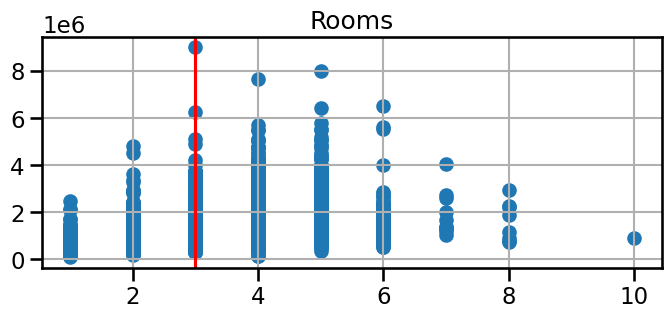

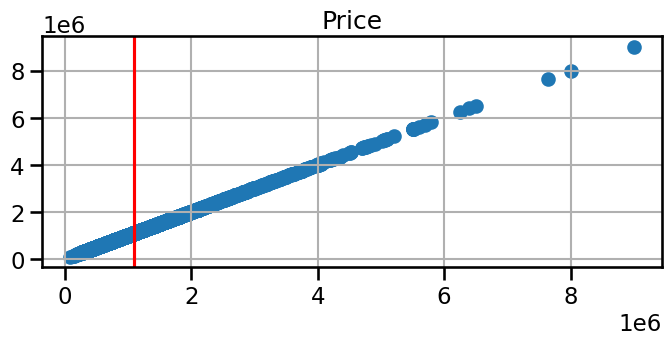

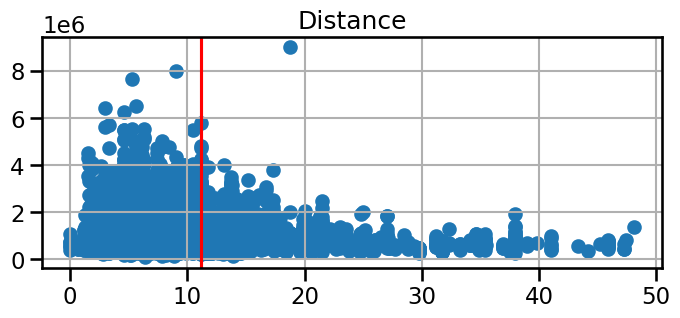

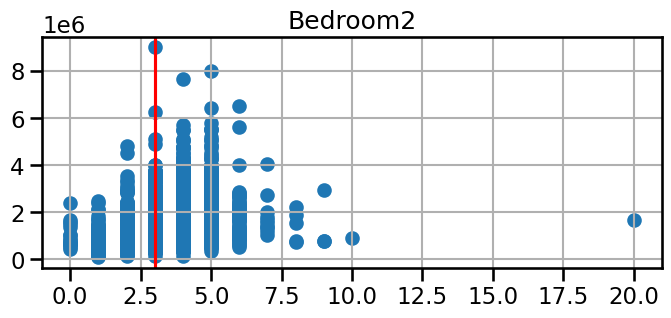

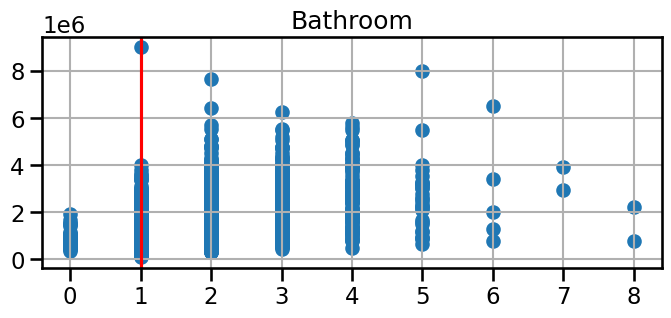

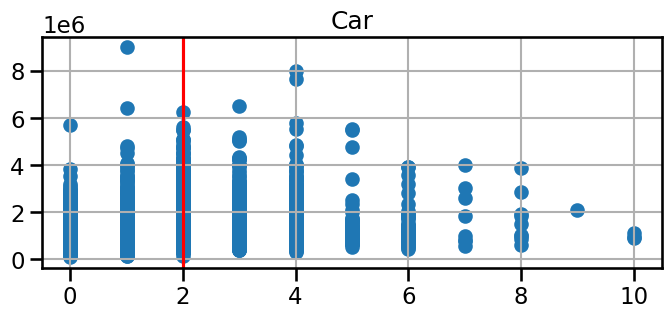

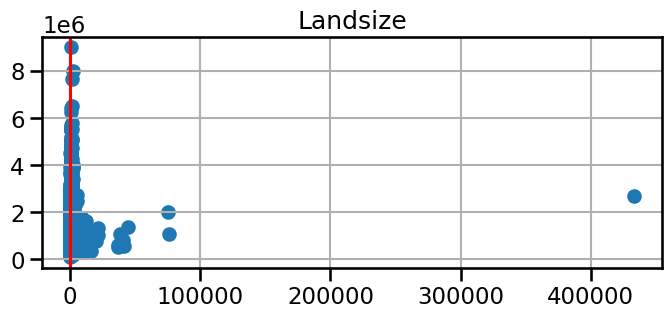

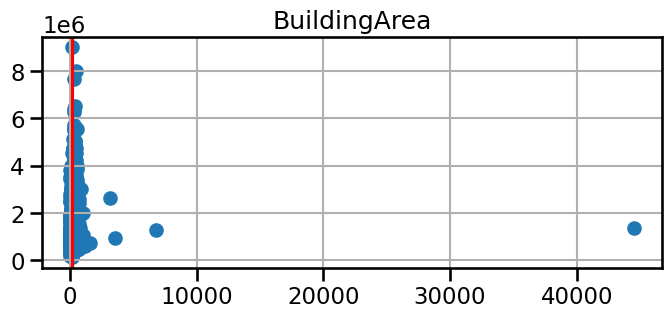

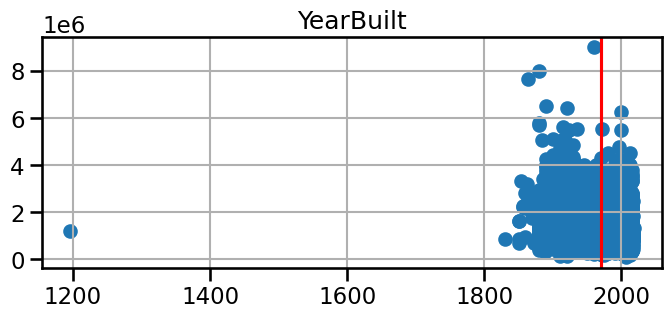

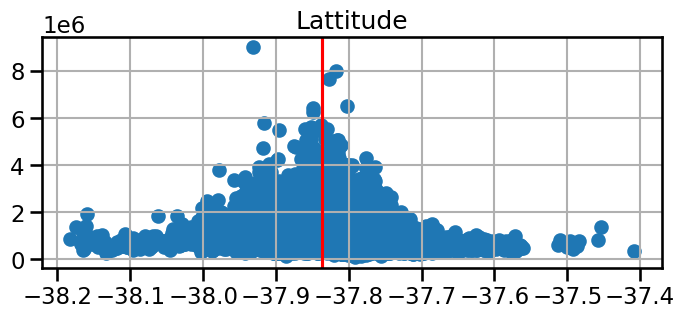

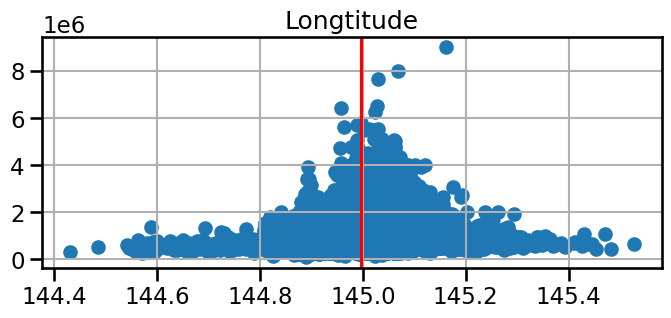

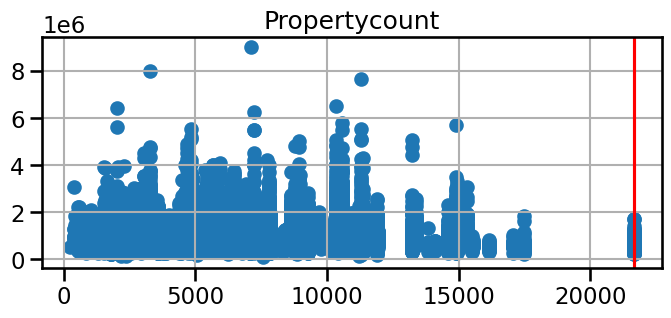

In [ ]:
for col in num_cols:
  plt.figure(figsize=(8,3))
  plt.scatter(df[col], df['Price'])
  plt.axvline(df[col].mode()[0], color='r')
  plt.grid()
  plt.title(col)
  plt.show()

Outliers:
- En la variable Bedroom2 vemos que tiene un valor extremo = 20.
- En la variable Landsize vemos que tiene un valor extremo > 400000
- En la variable BuildingArea vemos que tiene un valor extremo > 40000
- En la variable YearBuilt vemos que tiene un valor extremo en 1200

Quitamos estos valores extremos

In [ ]:
df = df[df['Bedroom2'] < 20]
df = df[df['Landsize'] < 400000]
df = df[df['BuildingArea'] < 40000]
df = df[df['YearBuilt'] > 1200]

Veamos nuevamente la correlación

In [ ]:
corr = df_join[num_cols].corr()['Price']
corr

Rooms            0.496634
Price            1.000000
Distance        -0.162522
Bedroom2         0.475951
Bathroom         0.467038
Car              0.238979
Landsize         0.037507
BuildingArea     0.090981
YearBuilt       -0.323617
Lattitude       -0.212934
Longtitude       0.203656
Propertycount   -0.042153
Name: Price, dtype: float64

Realizamos boxplots para las variables discretas

<ipython-input-22-6c5260c8ebc5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var['count'] = df_var[col].astype(str)


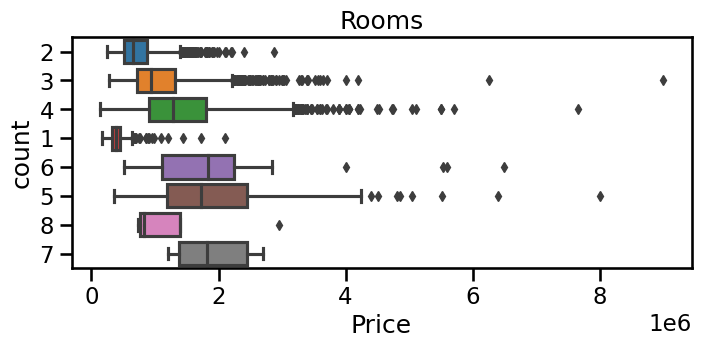

<ipython-input-22-6c5260c8ebc5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var['count'] = df_var[col].astype(str)


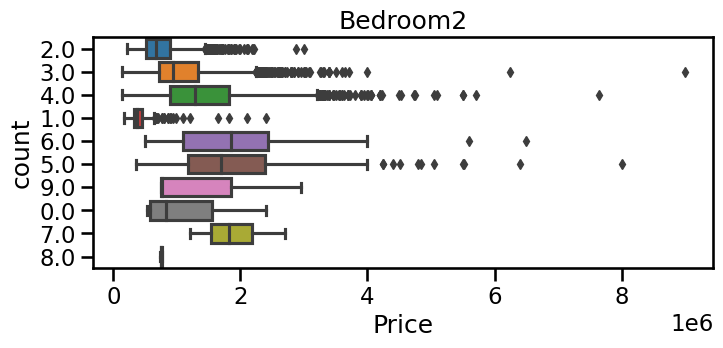

<ipython-input-22-6c5260c8ebc5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var['count'] = df_var[col].astype(str)


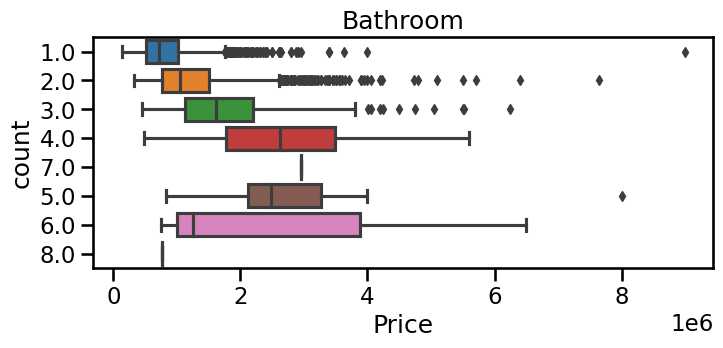

<ipython-input-22-6c5260c8ebc5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var['count'] = df_var[col].astype(str)


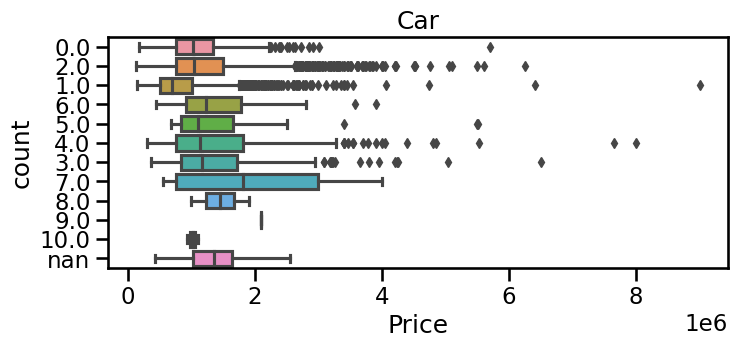

In [ ]:
discrete_cols = ['Rooms', 'Bedroom2', 'Bathroom', 'Car']
for col in discrete_cols:
  df_var = df[[col, 'Price']]
  df_var['count'] = df_var[col].astype(str)
  plt.figure(figsize=(8,3))
  sns.boxplot(data=df_var, x='Price', y='count')
  plt.title(col)
  plt.show()

Separamos a las variables continuas en 6 cuantiles y realizamos los boxplots del Precio.

Se eligen 6 ya que para más cuantiles el código da el siguiente error:

"ValueError: Bin labels must be one fewer than the number of bin edges"

<ipython-input-52-004e351bbbe3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var['quantile'] = pd.qcut(df_var[col], 6, labels=['1','2','3','4','5','6'])


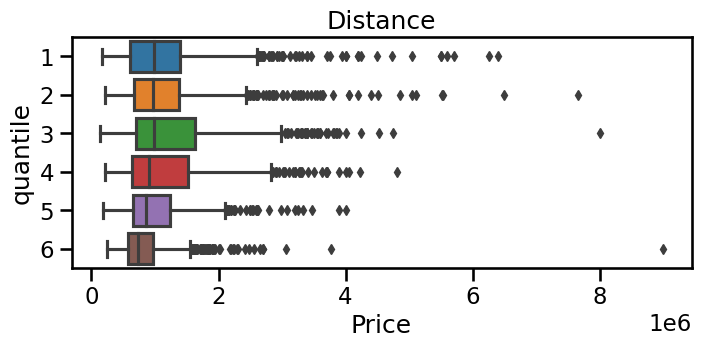

<ipython-input-52-004e351bbbe3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var['quantile'] = pd.qcut(df_var[col], 6, labels=['1','2','3','4','5','6'])


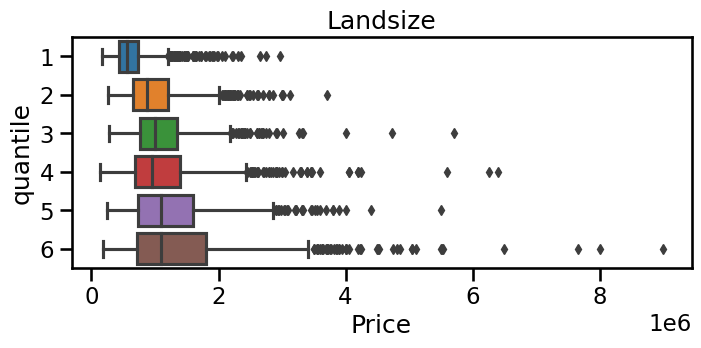

<ipython-input-52-004e351bbbe3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var['quantile'] = pd.qcut(df_var[col], 6, labels=['1','2','3','4','5','6'])


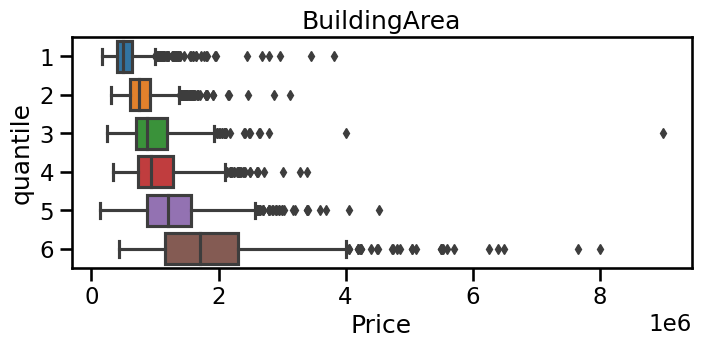

<ipython-input-52-004e351bbbe3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var['quantile'] = pd.qcut(df_var[col], 6, labels=['1','2','3','4','5','6'])


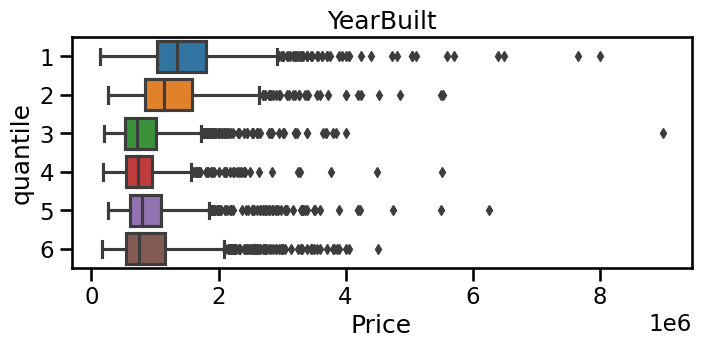

<ipython-input-52-004e351bbbe3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var['quantile'] = pd.qcut(df_var[col], 6, labels=['1','2','3','4','5','6'])


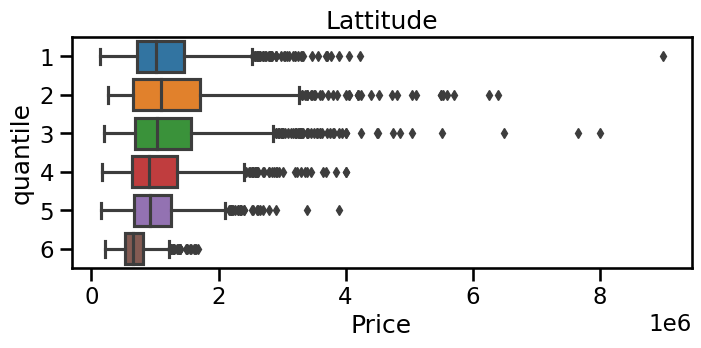

<ipython-input-52-004e351bbbe3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var['quantile'] = pd.qcut(df_var[col], 6, labels=['1','2','3','4','5','6'])


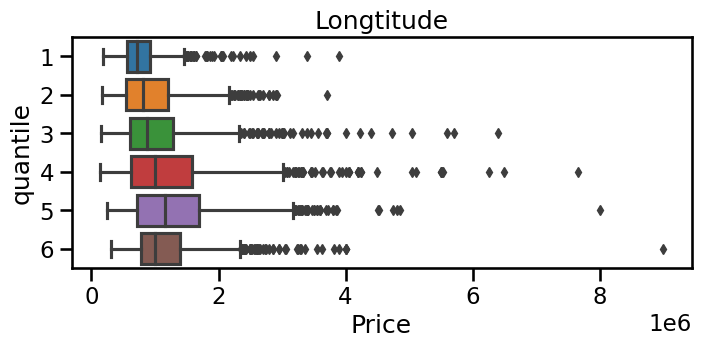

KeyError: ignored

In [ ]:
continuous_cols = [x for x in num_cols if x not in discrete_cols and x!='Price']
for col in continuous_cols:
  df_var = df[[col, 'Price']]
  df_var['quantile'] = pd.qcut(df_var[col], 6, labels=['1','2','3','4','5','6'])
  plt.figure(figsize=(8,3))
  sns.boxplot(data=df_var, x='Price', y='quantile')
  plt.title(col)
  plt.show()

Viendo la correlación y los gráficos anteriores tomamos deciciones respecto a cada columna:


*   Rooms: La correlación con el Precio es de 0.52 por lo que consideramos que es importante para la predicción del valor de la propiedad.
*   Bedroom2: La correlación con el Precio es de 0.5 por lo que consideramos que es importante para la predicción del valor de la propiedad.
*   Bathroom: La correlación con el Precio es de 0.49 por lo que consideramos que es importante para la predicción del valor de la propiedad.
*   Car: La correlación Con el Precio es de 0.25. Viendo el scatterplot y el boxplot de la variable Car no se ve una relación clara con el Precio por lo que la descartamos.
*   Distance: Si bien la correlación con el Precio es relativamente baja (-0.16), se puede observar que para valores en el scatterplot que para valores menores a 20, el precio alcanza los valores más altos mientras que para valores mayores a 20 el precio permanece acotado a valores pequeños. Por esta razón la consideramos en el dataset.
*   Landsize: Se puede observar en el boxplot que las distribuciones son diferentes para cada cuantil, por lo que consideramos que es una variable importante para predecir el valor de la propiedad y la consideramos en el dataset.
*   BuildingArea: Sucede lo mismo que en la variable Landsize, además que posee una correlación alta con el Precio, por lo que la consideramos en el dataset. 
*   YearBuilt: En el boxplot se puede observar que para cuantiles más bajos (1 y 2) el Precio alcanza valores mayores que para el resto de los cuantiles. Además la correlación es negativa, lo que tiene sentido suponiendo que, cuando más vieja es la propiedad, esta pierde valor. La consideramos en el dataset.
*   Lattitude: En el boxplot se puede observar que para cuantiles intermedios (2 y 3) el Precio alcanza valores mayores que para el resto de los cuantiles. La consideramos en el dataset.
*   Longitude: En el boxplot se puede observar que para cuantiles intermedios (4 y 5) el Precio alcanza valores mayores que para el resto de los cuantiles. La consideramos en el dataset.
*   Propertycount: La correlación Con el Precio es de -0.05. Viendo el scatterplot y el boxplot de la variable Propertycount no se ve una relación clara con el Precio por lo que la descartamos.



In [ ]:
selected_num_cols = ['Rooms', 'Bedroom2', 'Bathroom', 'Distance', 'Landsize',
                    'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']

#### Análisis de variables categóricas

In [ ]:
cat_cols

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'Postcode',
 'CouncilArea',
 'Regionname']

Veamos la cardinalidad de cada una y el porcentaje de repeticiones que tienen las 10 categorías con mayor cantidad:

In [ ]:
for col in cat_cols:
  print(col)
  print('Cardinalidad:', df[col].nunique())
  print(100*df[col].value_counts(normalize=True).iloc[:10])
  print()

Suburb
Cardinalidad: 300
Reservoir         2.479218
Richmond          2.085460
Brunswick         1.910456
Bentleigh East    1.677118
Coburg            1.604200
Essendon          1.531282
Preston           1.472947
Hawthorn          1.429196
Yarraville        1.400029
Glenroy           1.356278
Name: Suburb, dtype: float64

Address
Cardinalidad: 6771
1/1 Clarendon St    0.043751
36 Aberfeldie St    0.043751
34 Soudan St        0.029167
12 Witchwood Cl     0.029167
66 Roseberry St     0.029167
3/39 Dover St       0.029167
13 Robinson St      0.029167
2 May St            0.029167
2/7 Gordon St       0.029167
5 Aroona Ct         0.029167
Name: Address, dtype: float64

Type
Cardinalidad: 3
h    68.338924
u    22.298381
t     9.362695
Name: Type, dtype: float64

Method
Cardinalidad: 5
S     64.022167
SP    14.423217
PI    12.060668
VB     8.852268
SA     0.641680
Name: Method, dtype: float64

SellerG
Cardinalidad: 214
Nelson           11.929415
Jellis           10.354382
hockingstuart     8.

* Suburb: Tiene 300 valores diferentes y la categoría que posee la mayor cantidad de casos solo tiene el 2,5% por lo que la descartamos.
* Address: La descartamos ya que la dirección es única para cada propiedad y no es representativa.
* Type: Tiene 3 valores únicos, la consideramos en el dataset.
* Method: Posee 5 valores únicos, la consideramos en el dataset.
* SellerG: Posee 214 valores únicos, pero vemos que algunos de estos valores poseen un gran porcentaje, como Nelson que tiene el 12% o Jellis con el 10%. La consideramos en el dataset.
* Date: No consieramos que sea relevante, la descartamos.
* Postcode: Tiene 190 valores diferentes y la categoría que posee la mayor cantidad de casos solo tiene el 2,5% por lo que la descartamos.
* CouncilArea: Posee 31 valores únicos, pero vemos que algunos de estos valores poseen un gran porcentaje de casos, como Moreland que tiene el 10% o Boroondara con el 9%. La consideramos en el dataset.
* Regionname: Tiene 8 valores únicos, la consideramos en el dataset.

In [ ]:
preselected_cat_cols = ['Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']

En el caso de las variables de mayor cardinalidad, CouncilArea y SellerG, creamos una categoría nueva "Other" para agrupar a los valores que posean menos del 1% de los casos.

In [ ]:
for col in ['SellerG', 'CouncilArea']:
  value_counts = 100*df[col].value_counts(normalize=True)
  lower_values = value_counts[value_counts<1].index.tolist()
  df[col] = df[col].apply(lambda x: 'Other' if x in lower_values else x)

Veamos la nueva cardinalidad de ambas variables

In [ ]:
df['SellerG'].nunique()

25

In [ ]:
df['CouncilArea'].nunique()

21

Ahora veamos los boxplots para las variables categóricas preseleccionadas

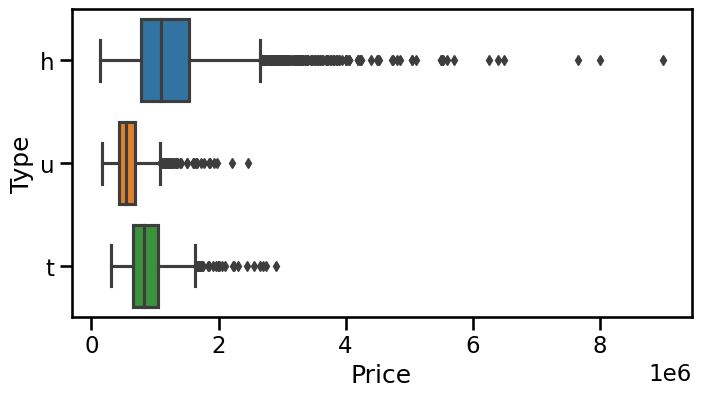

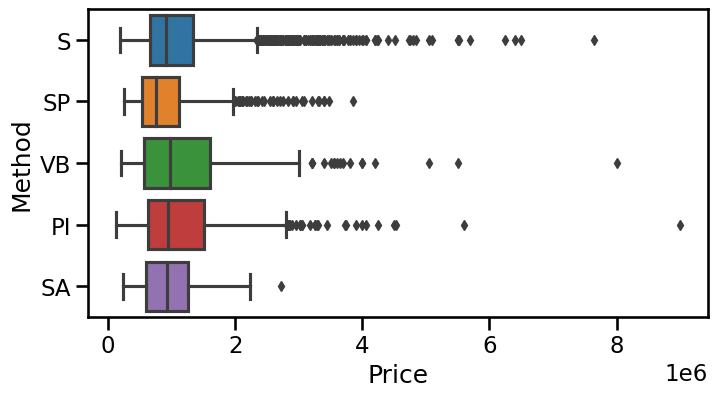

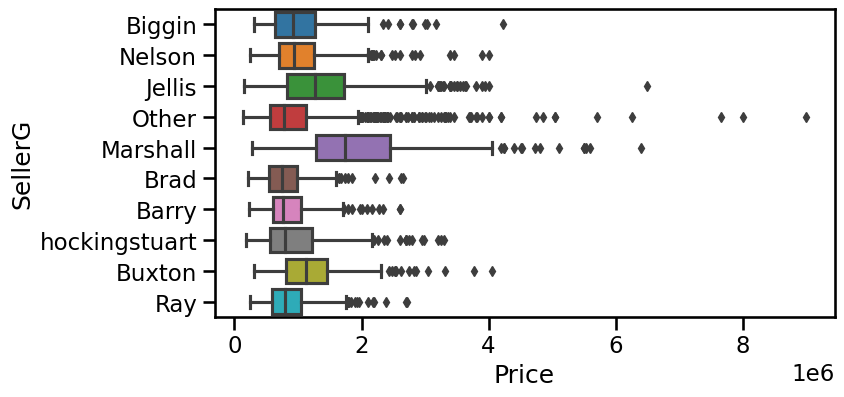

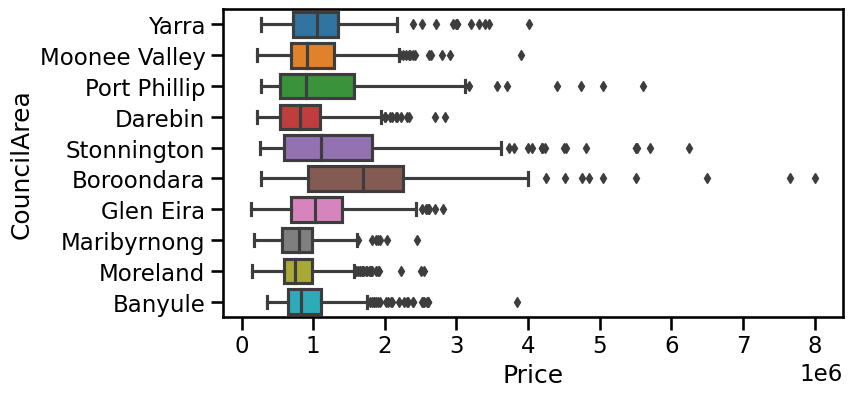

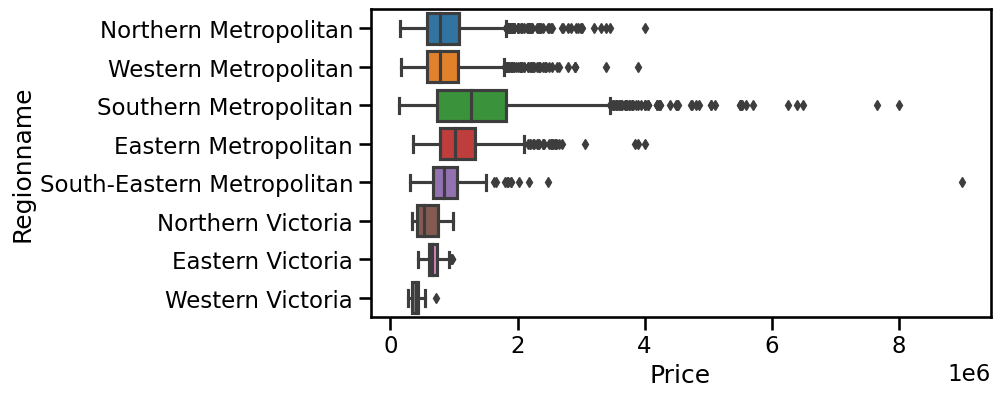

In [ ]:
for col in preselected_cat_cols:
  values = df[col].value_counts(normalize=True).index[:10].tolist()
  plt.figure(figsize=(8,4))
  sns.boxplot(data=df[df[col].isin(values)], y=col, x='Price')
  plt.show()

En todos los casos vemos que hay valores para los cuales el precio tiende a tener precios mayores que en otros por lo que seleccionamos todas estas variables

In [ ]:
selected_cat_cols = preselected_cat_cols

#### Unificamos variables seleccionadas numéricas y categóricas

In [ ]:
selected_cols = selected_num_cols + selected_cat_cols

In [ ]:
selected_cols

['Rooms',
 'Bedroom2',
 'Bathroom',
 'Distance',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Type',
 'Method',
 'SellerG',
 'CouncilArea',
 'Regionname']

In [ ]:
df = df[selected_cols + ['Price', 'Postcode']]

In [ ]:
df.head()

,Rooms,Bedroom2,Bathroom,Distance,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Type,Method,SellerG,CouncilArea,Regionname,Price,Postcode
1,2,2.0,1.0,2.5,156.0,79.0,1900.0,-37.8079,144.9934,h,S,Biggin,Yarra,Northern Metropolitan,1035000.0,3067.0
2,3,3.0,2.0,2.5,134.0,150.0,1900.0,-37.8093,144.9944,h,SP,Biggin,Yarra,Northern Metropolitan,1465000.0,3067.0
4,4,3.0,1.0,2.5,120.0,142.0,2014.0,-37.8072,144.9941,h,VB,Nelson,Yarra,Northern Metropolitan,1600000.0,3067.0
6,3,4.0,2.0,2.5,245.0,210.0,1910.0,-37.8024,144.9993,h,S,Nelson,Yarra,Northern Metropolitan,1876000.0,3067.0
7,2,2.0,1.0,2.5,256.0,107.0,1890.0,-37.8060,144.9954,h,S,Nelson,Yarra,Northern Metropolitan,1636000.0,3067.0


### Actividad 2

In [ ]:
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv')

<ipython-input-37-609a2c4e1632>:1: DtypeWarning: Columns (35,77) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pd.read_csv(


In [ ]:
# Se estandariza el tipo de datos para la columna zipcode
airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce')

In [ ]:
airbnb_df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighborhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighborhood,city,suburb,state,zipcode,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,2.018120e+13,12/7/2018,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,"YES ! The bus (305,309) is exactly two blocks ...","Kitchen, backyard, upstairs lounge. We'd like ...",As much as the guest wants.,Prefence would be given females or a couple,https://a0.muscache.com/im/pictures/44620/5a58...,33057,https://www.airbnb.com/users/show/33057,Manju,8/21/2009,AU,About us: We are an East Indian couple in our ...,a few days or more,0%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,"['email', 'phone', 'reviews']",f,f,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105.0,"Bulleen, Australia",AU,Australia,-37.772684,145.092133,f,House,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,""Pets live on this property"",Do...",60,NaN,NaN,NaN,NaN,1,22,1,365,17 months ago,t,30,60,90,365,12/7/2018,4,5/24/2011,9/12/2015,90.0,9.0,10.0,10.0,10.0,9.0,9.0,f,NaN,f,strict_14_with_grace_period,f,f,1,0.04
1,10803,https://www.airbnb.com/rooms/10803,2.018120e+13,12/7/2018,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,Easy transport options - the tram is right out...,Wifi. Bathroom and kitchen is shared but I mos...,I'm home mostly but sometimes I may be working...,Theres a yoga studio downstairs so if you see ...,https://a0.muscache.com/im/pictures/31323790/9...,38901,https://www.airbnb.com/users/show/38901,Lindsay,9/16/2009,"Melbourne, Victoria, Australia",As an artist working in animation and video I ...,NaN,NaN,f,https://a0.muscache.com/im/users/38901/profile...,https://a0.muscache.com/im/users/38901/profile...,Brunswick,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057.0,"Brunswick East, Australia",AU,Australia,-37.766505,144.980736,t,Apartment,Private room,2,1.0,1.0,1.0,Futon,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",35,200.0,803.0,0.0,9.0,1,15,3,45,6 weeks ago,t,4,9,33,213,12/7/2018,108,1/12/2013,11/26/2018,87.0,9.0,8.0,9.0,9.0,9.0,9.0,f,NaN,t,moderate,t,t,1,1.50
2,12936,https://www.airbnb.com/rooms/12936,2.018120e+13,12/7/2018,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,Our apartmen

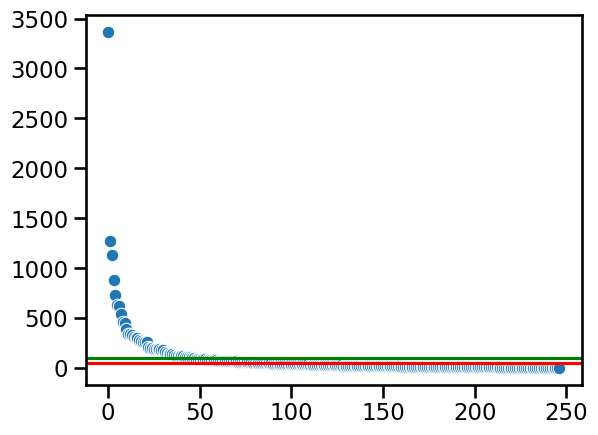

In [ ]:
sns.scatterplot(airbnb_df.zipcode.value_counts().values)
plt.axhline(100, color='g')
plt.axhline(50, color='r')

Incluimos los zipcodes que tengan una cantidad mayor o igual a 100 registros para que la información agregada sea relevante

In [ ]:
value_counts = airbnb_df.zipcode.value_counts()
value_counts = value_counts[value_counts>=100]
airbnb_df = airbnb_df[airbnb_df['zipcode'].isin(value_counts.index.tolist())]

In [ ]:
airbnb_price_by_zipcode = airbnb_df.groupby('zipcode')\
  .agg({'price': ['mean', 'count'], 'weekly_price': 'mean',
        'monthly_price': 'mean', 'number_of_reviews': ['sum', 'mean'],
        'review_scores_rating': ['min', 'max', 'mean']})\
  .reset_index()
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]

In [ ]:
airbnb_price_by_zipcode.columns

Index(['zipcode', 'price mean', 'price count', 'weekly_price mean',
       'monthly_price mean', 'number_of_reviews sum', 'number_of_reviews mean',
       'review_scores_rating min', 'review_scores_rating max',
       'review_scores_rating mean'],
      dtype='object')

In [ ]:
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'airbnb_price_mean',
             'price count': 'airbnb_record_count',
             'weekly_price mean': 'airbnb_weekly_price_mean',
             'monthly_price mean': 'airbnb_monthly_price_mean',
             'number_of_reviews sum': 'airbnb_number_of_reviews_sum', 
             'number_of_reviews mean': 'airbnb_number_of_reviews_mean', 
             'review_scores_rating min': 'airbnb_review_scores_rating_min', 
             'review_scores_rating max': 'airbnb_review_scores_rating_max',
             'review_scores_rating mean': 'airbnb_review_scores_rating_mean'}
)

In [ ]:
airbnb_price_by_zipcode.head()

,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,airbnb_number_of_reviews_sum,airbnb_number_of_reviews_mean,airbnb_review_scores_rating_min,airbnb_review_scores_rating_max,airbnb_review_scores_rating_mean
0,3000.0,150.504307,3367,918.738956,3407.204651,119050,35.357885,20.0,100.0,92.775407
1,3002.0,200.979695,197,956.379310,3712.714286,4768,24.203046,60.0,100.0,94.883562
2,3003.0,130.205993,267,760.200000,2629.500000,5351,20.041199,47.0,100.0,93.899038
3,3004.0,158.271978,728,1061.171429,3759.925926,16928,23.252747,20.0,100.0,93.636691
4,3006.0,188.851735,1268,1239.827273,4358.556701,35175,27.740536,20.0,100.0,94.168574


In [ ]:
df_join = df.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode'
)
df_join.sample(5)

,Rooms,Bedroom2,Bathroom,Distance,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Type,Method,SellerG,CouncilArea,Regionname,Price,Postcode,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,airbnb_number_of_reviews_sum,airbnb_number_of_reviews_mean,airbnb_review_scores_rating_min,airbnb_review_scores_rating_max,airbnb_review_scores_rating_mean
6135,3,3.0,2.0,17.9,555.0,196.0,1990.0,-37.67640,145.05085,h,S,Ray,Whittlesea,Northern Metropolitan,668000.0,3082.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5046,3,3.0,2.0,4.3,150.0,125.0,1990.0,-37.77639,144.91666,h,S,Brad,Moonee Valley,Western Metropolitan,1010000.0,3032.0,3032.0,111.613636,176.0,469.866667,1677.916667,3424.0,19.454545,20.0,100.0,94.294118
2085,4,4.0,3.0,7.4,585.0,248.0,1915.0,-37.86800,145.03800,h,S,Marshall,Stonnington,Southern Metropolitan,3470000.0,3144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6384,3,3.0,1.0,10.2,649.0,101.0,1950.0,-37.87000,145.08803,h,S,Jellis,NaN,Southern Metropolitan,1555000.0,3147.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5729,2,2.0,1.0,13.4,305.0,305.0,1940.0,-37.80906,145.15787,u,S,Other,Whitehorse,Eastern Metropolitan,706000.0,3130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Actividad 3

Se podría utilizar la variable Suburb que se encuentra en ambos datasets y posee una cardinalidad mayor al código postal en ambos casos

In [ ]:
print('Cardinalidad Código postal:', melb_df.Postcode.nunique())
print('Cardinalidad Suburbio:', melb_df.Suburb.nunique())

Cardinalidad Código postal: 198
Cardinalidad Suburbio: 314


In [ ]:
print('Cardinalidad Código postal:', airbnb_df.zipcode.nunique())
print('Cardinalidad Suburbio:', airbnb_df.suburb.nunique())

Cardinalidad Código postal: 48
Cardinalidad Suburbio: 153


Otra opción sería utilizar la latitud y longitud que se encuentra en ambos datasets y encontrar todas las propiedades que se encuentren a cierta distancia.

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [ ]:
df_join.head()

,Rooms,Bedroom2,Bathroom,Distance,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Type,Method,SellerG,CouncilArea,Regionname,Price,Postcode,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,airbnb_number_of_reviews_sum,airbnb_number_of_reviews_mean,airbnb_review_scores_rating_min,airbnb_review_scores_rating_max,airbnb_review_scores_rating_mean
0,2,2.0,1.0,2.5,156.0,79.0,1900.0,-37.8079,144.9934,h,S,Biggin,Yarra,Northern Metropolitan,1035000.0,3067.0,3067.0,130.624031,258.0,605.152174,2187.032258,4029.0,15.616279,20.0,100.0,95.288462
1,3,3.0,2.0,2.5,134.0,150.0,1900.0,-37.8093,144.9944,h,SP,Biggin,Yarra,Northern Metropolitan,1465000.0,3067.0,3067.0,130.624031,258.0,605.152174,2187.032258,4029.0,15.616279,20.0,100.0,95.288462
2,4,3.0,1.0,2.5,120.0,142.0,2014.0,-37.8072,144.9941,h,VB,Nelson,Yarra,Northern Metropolitan,1600000.0,3067.0,3067.0,130.624031,258.0,605.152174,2187.032258,4029.0,15.616279,20.0,100.0,95.288462
3,3,4.0,2.0,2.5,245.0,210.0,1910.0,-37.8024,144.9993,h,S,Nelson,Yarra,Northern Metropolitan,1876000.0,3067.0,3067.0,130.624031,258.0,605.152174,2187.032258,4029.0,15.616279,20.0,100.0,95.288462
4,2,2.0,1.0,2.5,256.0,107.0,1890.0,-37.8060,144.9954,h,S,Nelson,Yarra,Northern Metropolitan,1636000.0,3067.0,3067.0,130.624031,258.0,605.152174,2187.032258,4029.0,15.616279,20.0,100.0,95.288462


Guardamos el dataset en un archivo csv:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/new_dataset.csv'

df_join.to_csv(path)

Mounted at /content/drive


## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)